# Projectile Motion
RK4+Bisection

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x,v,t):
  r= v
  return r

def g(x,v,t):
  r= -9.8
  return r

def rk4(x0,v0,t0,tn,n):

    h= (tn-t0)/n       # step size h
    time=[t0]          # list of t, x and y to append data
    position=[x0]
    velocity=[v0]
    for i in range(1,n):
      k1 = h*f(x0, v0, t0)
      l1 = h*g(x0, v0, t0)
      k2=h*f(x0+(k1)/2,v0+(l1)/2,t0+(h)/2)
      l2=h*g(x0+(k1)/2,v0+(l1)/2,t0+(h)/2)
      k3=h*f(x0+(k2)/2,v0+(l2)/2,(h)/2)
      l3=h*g(x0+(k2)/2,v0+(l2)/2,(h)/2)
      k4=h*f(x0+k3,v0+l3,t0+h)
      l4=h*g(x0+k3,v0+l3,t0+h)
        
        
      x1 = x0 + (1/6)*(k1+2*k2+2*k3+k4)
      v1 = v0 + (1/6)*(l1+2*l2+2*l3+l4)
      t1 = t0 + h
      position.append(x1)
      velocity.append(v1)
      time.append(t1)

      x0 = x1         # assign the modified values og x0 and y0 for the next iteration
      v0 = v1
      t0 = t1

    return (position,velocity,time)

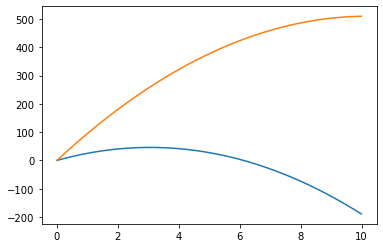

In [10]:
x0=0
v0=30
t0=0
tn=10
n=1000
v1=100
x,v,t=rk4(x0,v0,t0,tn,n)
x1,v1,t1=rk4(x0,v1,t0,tn,n)
# print(f(x0,v,t0))
plt.plot(t,x)
plt.plot(t1,x1)

In [11]:
def bisection(a,b,f,e):
    if f(a)*f(b)>0:
        print("enter other interval")
    while (abs(b-a)>e):
        c=(a+b)/2
        if f(a)*f(c)<0:
            b=c
        elif f(b)*f(c)<0:
            a=c
    return c

In [12]:
def z(v0):
    p,q,r=rk4(x0,v0,t0,tn,n)
    return p[-1]

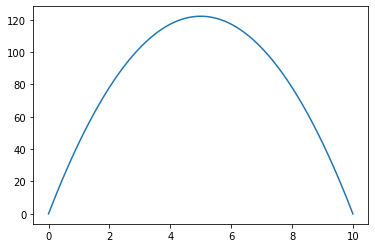

In [16]:
v0=30
v1=100
v3=bisection(v0,v1,z,.01)
p,q,r=rk4(x0,v3,t0,tn,n)
plt.plot(r,p)

# Solving SHM using Numerov+bisection

In [17]:
def V(x):
    return (1/x**2)-(1/x)
def function(x,E):
    return (V(x)-E)

In [18]:
def y(x,E,h):
    return 1-((h**2)*(function(x,E)))/12

In [19]:
def numerov(x0,xf,E,n):
    psi=np.zeros(n)
    psi[0]=0
    psi[-1]=0
    psi[1]=psi[0]+h**4
    x=np.arange(x0,xf,h)
    for i in range(1,n-1):
        psi[i+1]=(psi[i]*(12-10*y(x[i],E,h))-y(x[i-1],E,h)*psi[i-1])/y(x[i+1],E,h)
    return psi

In [233]:
x0=-6
xf=6
n=1000
h=(xf-x0)/n
x=np.arange(x0,xf,h)
E1=0
E2=5
p1=numerov(x0,xf,E1,n)
p2=numerov(x0,xf,E2,n)

In [222]:
import scipy.integrate
def normalize_psi(psi, x):
   int_psi_square = scipy.integrate.simps(abs(psi) ** 2, x)
   return psi/np.sqrt(int_psi_square)
P1=normalize_psi(p1,x)
P2=normalize_psi(p2,x)
# plt.plot(x,P1)
# plt.plot(x,P2)
# plt.grid()
max(P2)

0.5989797427668259

In [223]:
def q(E):
    return numerov(x0,xf,E,n)[-1]

In [224]:
en=bisection(E1,E2,q,10**(-7))

In [225]:
en

0.08991695940494537

In [226]:
En=numerov(x0,xf,en,n)

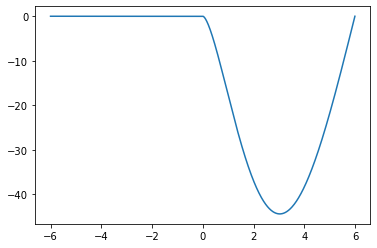

In [227]:
plt.plot(x,En)

In [209]:
def nodes(En):
    n=0
    for i in range(0,len(En)-1):
        if En[i]*En[i+1]<0:
            n+=1
    return n

In [210]:
nodes(En)

0

In [234]:
#FUNCTION FOR FINDING ALL THE BOUND STATE ENERGIES WITHOUT MAKING GUESSES

def enval(e0,ef):
    energies=[]
    de=0.001
    n=int((ef-e0)/de)
    e1=e0+de
    for i in range(n):
        psi=numerov(x0,xf,e0,n)
        psi1=numerov(x0,xf,e1,n)
        if nodes(psi)<nodes(psi1):
            energies.append(e1)
        e0=e1
        e1=e1+de
    return energies

In [235]:
enval(0,2)

IndexError: index 1000 is out of bounds for axis 0 with size 1000